In [3]:
# Описание всего этого в конце

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cdr3_surface_tool

from cdr3_surface_tool import *
from Bio import pairwise2
from functools import *

In [4]:
# Fetch refined structural data
df = pd.DataFrame(pd.read_table('structure_refined.txt'))
df = df[df['tcr_region'] == 'CDR3']
df.loc[df.tcr_v_allele.str.startswith('TRA'), 'tcr_v_allele'] = 'alpha'
df.loc[df.tcr_v_allele.str.startswith('TRB'), 'tcr_v_allele'] = 'beta'

Now we can start analysis

In [5]:
antigen_dict = {key: list(set(group)) for key, group in df.groupby('antigen_seq')['pdb_id']}
antigen_dict

{'AAGIGILTV': ['3qdj', '3qeq'],
 'ADGLAYFRSSFKGG': ['4p2q'],
 'ADLIAYLKQATKG': ['3qiu'],
 'ALWGPDPAAA': ['3uts'],
 'ANGVAFFLTPFKA': ['4p2r'],
 'APQPELPYPQPG': ['4ozh'],
 'APQPELPYPQPGS': ['4ozf'],
 'EAAGIGILTV': ['4qok'],
 'EENLLDFVRF': ['3dxa'],
 'EEYLKAWTF': ['3kpr'],
 'EEYLQAFTY': ['3kps'],
 'ELAAIGILTV': ['4jfd'],
 'ELAGIGALTV': ['4jfe'],
 'ELAGIGILTV': ['3hg1', '4jff', '3qdg', '4l3e', '3qdm'],
 'EPLPQGQLTAY': ['2nx5'],
 'EQYKFYSV': ['1mwa'],
 'FLRGRAYGL': ['1mi5', '3ffc', '3sjv'],
 'GAMKRHGLDNYRGYSLG': ['3mbe'],
 'GELIGILNAAKVPAD': ['4e41', '2iam'],
 'GELIGTLNAAKVPAD': ['2ian'],
 'GILGFVFTL': ['1oga'],
 'GLCTLVAML': ['3o4l'],
 'GNSHRGAIEWEGIESG': ['1d9k'],
 'HPVGDADYFEY': ['4prh'],
 'HPVGEADYFEY': ['4pri', '3mv7'],
 'HPVGQADYFEY': ['4prp'],
 'HSKKKCDEL': ['4qrp'],
 'ILAKFLHWL': ['4mnq'],
 'INFDFNTI': ['1fo0'],
 'KAFSPEVIPMF': ['2ypl'],
 'KRWIILGLNK': ['4g8g'],
 'KRWIIMGLNK': ['4g9f'],
 'KVITFIDL': ['1kj2'],
 'LGYGFVNYI': ['3pwp'],
 'LLFGFPVYV': ['3qfj'],
 'LLFGKPVYV': ['2gj6'],
 '

=================================== Antigen: AAGIGILTV ===================================


          alpha seq        beta seq
pdb_id                             
3qdj          CAVNF   CASSLSFGTEAFF
3qeq    CAGGTGNQFYF  CAISEVGVGQPQHF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id   3qdj   3qeq
pdb_id              
3qdj     1.00  -0.37
3qeq    -0.37   1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  3qdj  3qeq
pdb_id            
3qdj    1.00  0.09
3qeq    0.09  1.00


ENERGY

                 3qdj     3qeq
alpha energy  -5.9620  -8.0219
beta  energy -50.8324 -82.8310
total energy -56.7944 -90.8529


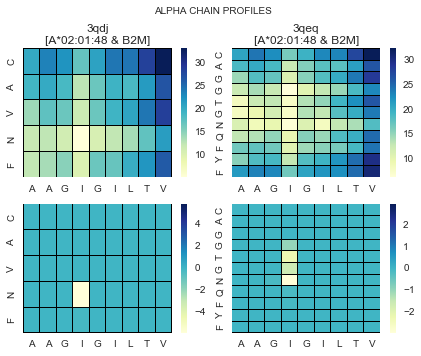

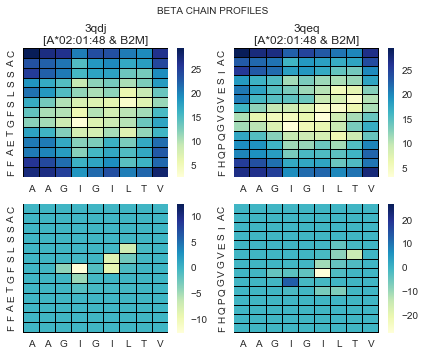

================================== Antigen: HPVGEADYFEY ==================================


              alpha seq      beta seq
pdb_id                               
3mv7    CAVQDLGTSGSRLTF  CASSARSGELFF
4pri    CAVQDLGTSGSRLTF  CASSARSGELFF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id  3mv7  4pri
pdb_id            
3mv7    1.00  1.00
4pri    1.00  1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  3mv7  4pri
pdb_id            
3mv7    1.00  1.00
4pri    1.00  1.00


ENERGY

                 3mv7     4pri
alpha energy -130.523 -140.584
beta  energy  -66.615  -54.966
total energy -197.138 -195.550


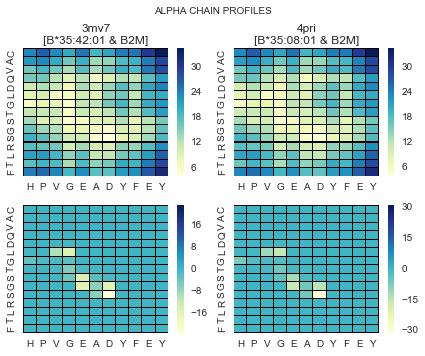

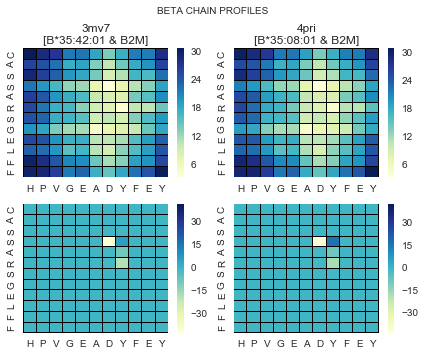

=================================== Antigen: SLLMWITQC ===================================


              alpha seq        beta seq
pdb_id                                 
2bnr    CAVRPTSGGSYIPTF  CASSYVGNTGELFF
2f54    CAVRPTSGGSYIPTF  CASSYVGNTGELFF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id  2bnr  2f54
pdb_id            
2bnr    1.00  1.00
2f54    1.00  1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  2bnr  2f54
pdb_id            
2bnr    1.00  1.00
2f54    1.00  1.00


ENERGY

                 2bnr      2f54
alpha energy -127.483  -30.2030
beta  energy  -86.060  -84.1042
total energy -213.543 -114.3072


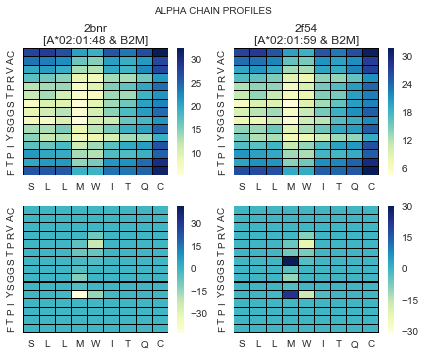

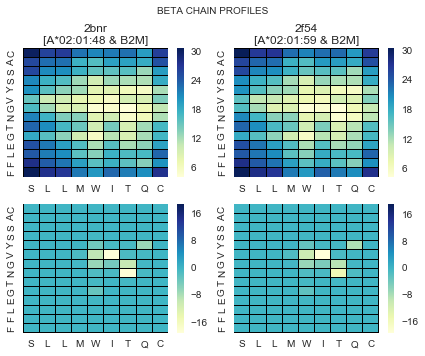

=================================== Antigen: FLRGRAYGL ===================================


               alpha seq            beta seq
pdb_id                                      
1mi5    CILPLAGGTSYGKLTF       CASSLGQAYEQYF
3ffc       CAMREDTGNQFYF  CASSFTWTSGGATDTQYF
3sjv          CVVRAGKLIF       CASGQGNFDIQYF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id   1mi5   3ffc   3sjv
pdb_id                     
1mi5     1.00  -0.24  -0.19
3ffc    -0.24   1.00  -0.13
3sjv    -0.19  -0.13   1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  1mi5  3ffc  3sjv
pdb_id                  
1mi5    1.00  0.07  0.40
3ffc    0.07  1.00  0.00
3sjv    0.40  0.00  1.00


ENERGY

                1mi5    3ffc    3sjv
alpha energy -16.888 -12.996 -14.466
beta  energy -56.160 -29.934 -48.342
total energy -73.048 -42.930 -62.808


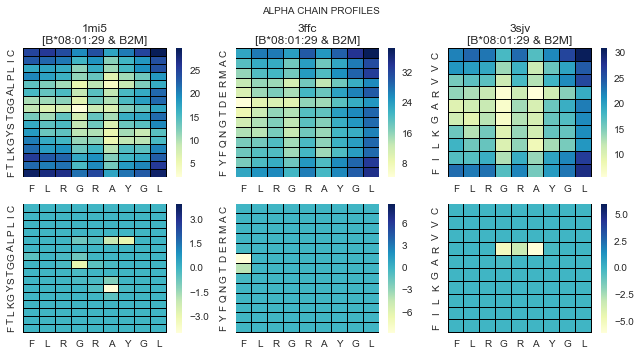

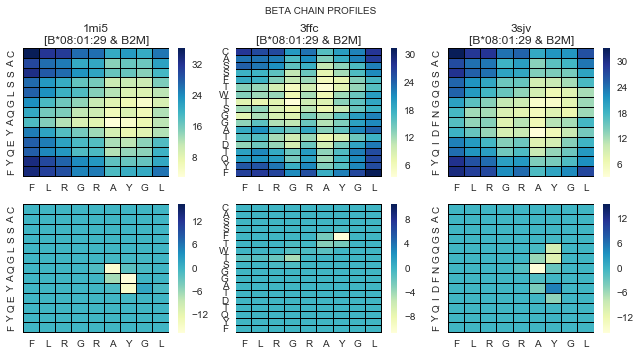

================================== Antigen: ELAGIGILTV ===================================


          alpha seq         beta seq
pdb_id                              
3hg1    CAVNVAGKSTF  CAWSETGLGTGELFF
3qdg          CAVNF    CASSLSFGTEAFF
3qdm    CAGGTGNQFYF   CAISEVGVGQPQHF
4jff    CAVNDGGRLTF  CAWSETGLGMGGWQF
4l3e          CAVNF    CASSWSFGTEAFF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id   3hg1   3qdg   3qdm   4jff   4l3e
pdb_id                                   
3hg1     1.00  -0.25   0.05   0.53  -0.25
3qdg    -0.25   1.00  -0.37  -0.25   1.00
3qdm     0.05  -0.37   1.00   0.17  -0.37
4jff     0.53  -0.25   0.17   1.00  -0.25
4l3e    -0.25   1.00  -0.37  -0.25   1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  3hg1  3qdg  3qdm  4jff  4l3e
pdb_id                              
3hg1    1.00  0.26  0.24  0.65  0.26
3qdg    0.26  1.00  0.09  0.00  0.90
3qdm    0.24  0.09  1.00  0.24  0.09
4jff    0.65  0.00  0.24  1.00  0.00
4l3e    0.26  0.90  0.09  0.00  1.00


ENERGY

            

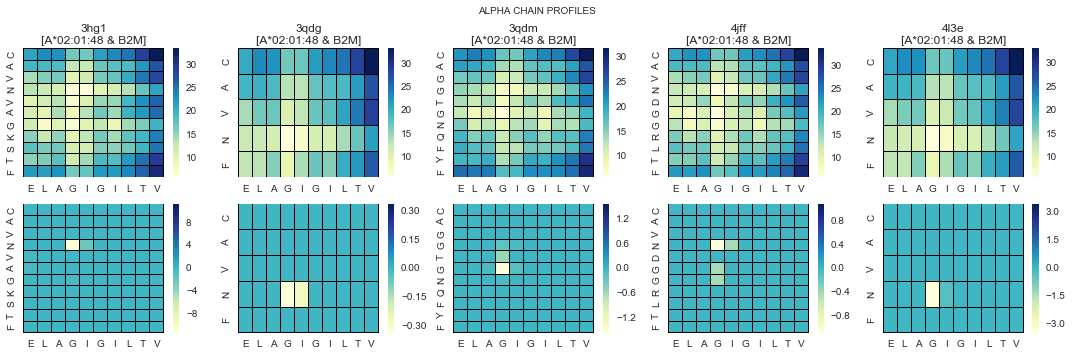

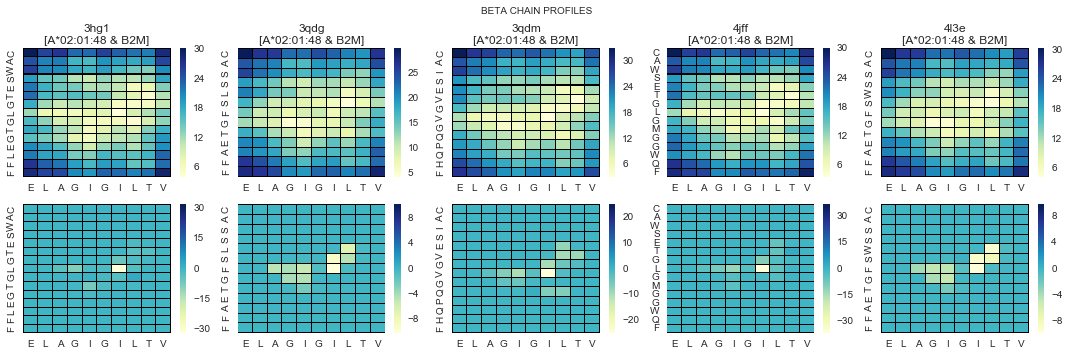

================================= Antigen: PKYVKQNTLKLAT =================================


              alpha seq        beta seq
pdb_id                                 
1fyt    CAVSESPFGNEKLTF  CASSSTGLPYGYTF
1j8h    CAVSESPFGNEKLTF  CASSSTGLPYGYTF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id  1fyt  1j8h
pdb_id            
1fyt    1.00  1.00
1j8h    1.00  1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  1fyt  1j8h
pdb_id            
1fyt    1.00  1.00
1j8h    1.00  1.00


ENERGY

                  1fyt      1j8h
alpha energy -117.5430 -118.5760
beta  energy  -30.3584  -46.1668
total energy -147.9014 -164.7428


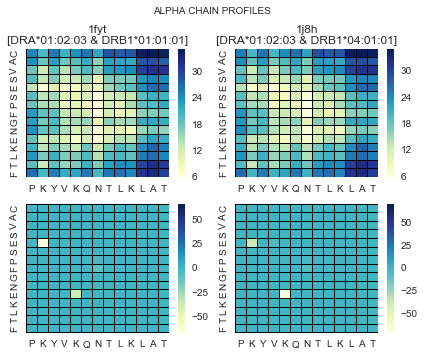

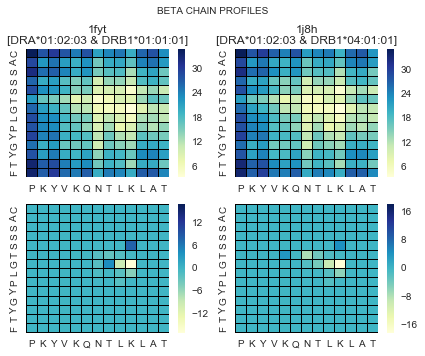

================================ Antigen: GELIGILNAAKVPAD ================================


             alpha seq      beta seq
pdb_id                              
2iam     CAALIQGAQKLVF   CASTYHGTGYF
4e41    CAVDRGSTLGRLYF  CASSQIRETQYF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id   2iam   4e41
pdb_id              
2iam     1.00  -0.00
4e41    -0.00   1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  2iam  4e41
pdb_id            
2iam    1.00  0.27
4e41    0.27  1.00


ENERGY

                 2iam     4e41
alpha energy  -46.328  -51.331
beta  energy  -56.508  -57.583
total energy -102.836 -108.914


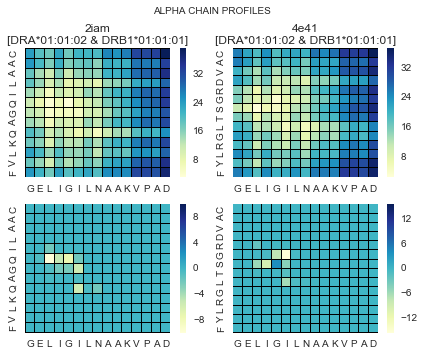

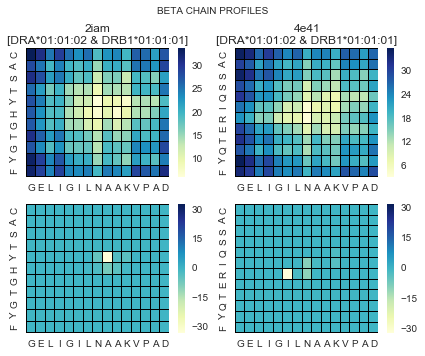

================================= Antigen: SGEGSFQPSQENP =================================


              alpha seq          beta seq
pdb_id                                   
4gg6    CILRDGRGGADGLTF  CASSVAVSAGTYEQYF
4z7v      CILRDSRAQKLVF   CASSAGTSGEYEQYF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id  4gg6  4z7v
pdb_id            
4gg6    1.00  0.35
4z7v    0.35  1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  4gg6  4z7v
pdb_id            
4gg6    1.00  0.53
4z7v    0.53  1.00


ENERGY

                  4gg6     4z7v
alpha energy  -92.2060  -97.381
beta  energy  -32.1594  -66.758
total energy -124.3654 -164.139


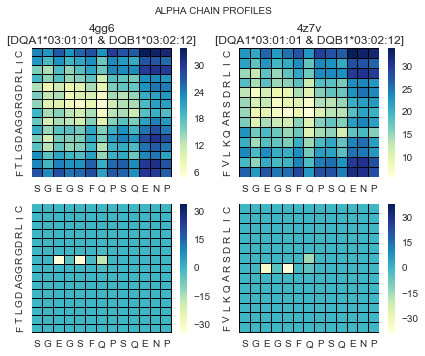

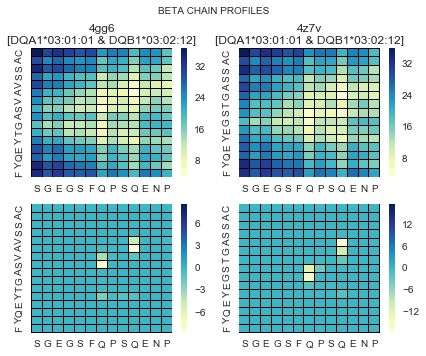

================================ Antigen: PSGEGSFQPSQENPQ ================================


            alpha seq          beta seq
pdb_id                                 
4z7u     CILRDRSNQFYF  CASSTTPGTGTETQYF
4z7w    CAVGETGANNLFF    CASSEARRYNEQFF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id   4z7u   4z7w
pdb_id              
4z7u     1.00  -0.08
4z7w    -0.08   1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  4z7u  4z7w
pdb_id            
4z7u    1.00  0.14
4z7w    0.14  1.00


ENERGY

                  4z7u     4z7w
alpha energy  -93.5400  -32.906
beta  energy  -54.3761 -122.258
total energy -147.9161 -155.164


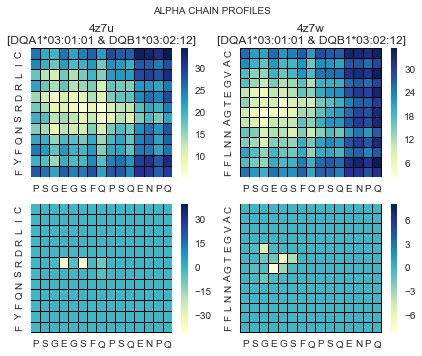

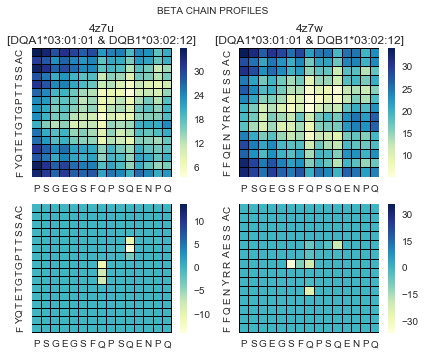

================================= Antigen: LPEPLPQGQLTAY =================================


             alpha seq        beta seq
pdb_id                                
2ak4    CALSGFYNTDKLIF  CASPGLAGEYEQYF
4jry     CAVGGGSNYQLIW  CASSRTGSTYEQYF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id  2ak4  4jry
pdb_id            
2ak4    1.00  0.19
4jry    0.19  1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  2ak4  4jry
pdb_id            
2ak4    1.00  0.44
4jry    0.44  1.00


ENERGY

                 2ak4     4jry
alpha energy -105.293   -0.124
beta  energy  -23.841 -129.846
total energy -129.134 -129.970


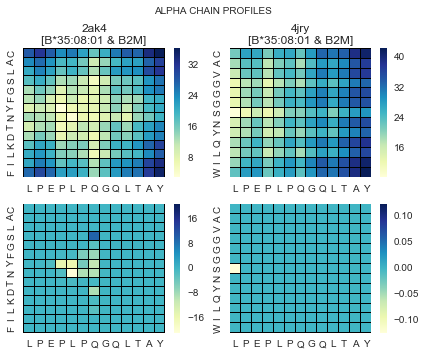

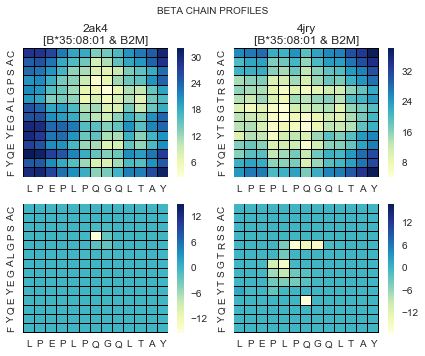

=================================== Antigen: LLFGYPVYV ===================================


            alpha seq          beta seq
pdb_id                                 
1ao7    CAVTTDSWGKLQF  CASRPGLAGGRPEQYF
1bd2     CAAMEGAQKLVF   CASSYPGGGFYEQYF
4ftv    CAVTTDSWGKLQF  CASRPGLMSAQPEQYF

ALPHA CDR3 STRING ALIGNMENT SCORES

pdb_id  1ao7  1bd2  4ftv
pdb_id                  
1ao7    1.00  0.12  1.00
1bd2    0.12  1.00  0.12
4ftv    1.00  0.12  1.00

BETA CDR3 STRING ALIGNMENT SCORES

pdb_id  1ao7  1bd2  4ftv
pdb_id                  
1ao7    1.00  0.36  0.68
1bd2    0.36  1.00  0.21
4ftv    0.68  0.21  1.00


ENERGY

                  1ao7     1bd2     4ftv
alpha energy  -46.9472 -22.8827  -62.542
beta  energy  -60.1420 -65.4715 -103.261
total energy -107.0892 -88.3542 -165.803


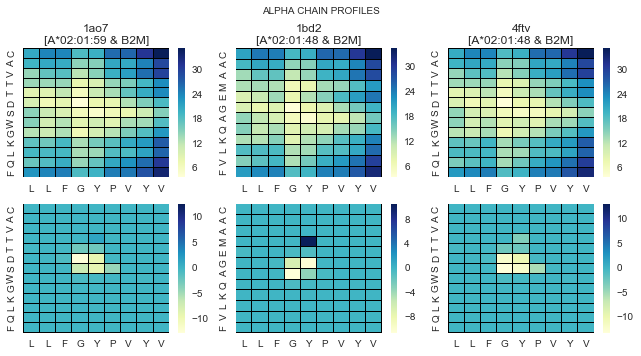

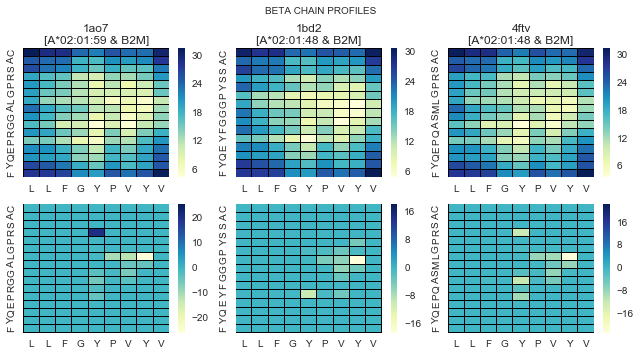

In [6]:
#cmap='YlGnBu'#sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=1)#sns.cubehelix_palette(as_cmap=1)

def align(a, b):
    res = pairwise2.align.globalms(a, b, 1.0, -0.3, -1.3, -1.3)[0]
    return res[2] / res[4]

def set_alignment(l, names):
    return pd.DataFrame([['%.2f' % align(a, b) for b in l] for a in l], names, names)

def print_grouped_info(grouped):
    seqs = grouped.apply(lambda x: [x[x.tcr_v_allele == 'alpha']['tcr_region_seq'].iloc[0], 
                                         x[x.tcr_v_allele == 'beta']['tcr_region_seq'].iloc[0]])
    aligment = pd.DataFrame(list(seqs), index=seqs.index, columns=['alpha seq', 'beta seq'])
    print(aligment)
    print('\nALPHA CDR3 STRING ALIGNMENT SCORES\n'); print(set_alignment(seqs.apply(lambda x: x[0]), seqs.index))
    print('\nBETA CDR3 STRING ALIGNMENT SCORES\n'); print(set_alignment(seqs.apply(lambda x: x[1]), seqs.index)); print()
    print('\nENERGY\n');
    print(pd.DataFrame({key: [sum(group[group.tcr_v_allele == 'alpha'].energy), 
       sum(group[group.tcr_v_allele == 'beta'].energy), 
       sum(group.energy)] for key, group in grouped}, index=['alpha energy', 'beta  energy', 'total energy']))

def plot_map_for_structure_table(grouped, name, allele, column, cmap='YlGnBu'):
    group = grouped.get_group(name); group = group[group.tcr_v_allele == allele];
    heatmap = group.pivot(index='pos_tcr', columns='pos_antigen', values=column);
    heatmap.index = [x for x in group.tcr_region_seq.iloc[0]]; 
    heatmap.columns = [x for x in group.antigen_seq.iloc[0]]
    sns.heatmap(heatmap, cmap=cmap, vmax=heatmap.max().max() + 0.1, linecolor='black', linewidths=0.01, annot=False)
    
def plot_maps_for_grouped(grouped, allele):
    i = 1;
    for key, group in grouped:
        plt.subplot(2, len(grouped), i); plot_map_for_structure_table(grouped_frame, key, allele, 'distance'); 
        plt.title('\n'+key+'\n['+group['mhc_a_allele'].iloc[0]+' & '+group['mhc_b_allele'].iloc[0]+']');
        plt.subplot(2, len(grouped), i + len(grouped)); 
        plot_map_for_structure_table(grouped_frame, key, allele, 'energy', 'YlGnBu');
        plt.tight_layout(); i += 1
        

for antigen in [key for key, value in antigen_dict.items() if len(value) > 1]:
    frame = df[df.antigen_seq == antigen]
    grouped_frame = frame.groupby('pdb_id')
    print(str(' Antigen: '+antigen+' ').center(90, '=')); print('\n')
    print_grouped_info(grouped_frame)
    plt.figure(figsize=(3*len(grouped_frame), 5))
    plot_maps_for_grouped(grouped_frame, 'alpha'); plt.suptitle('ALPHA CHAIN PROFILES')
    plt.figure(figsize=(3*len(grouped_frame), 5))
    plot_maps_for_grouped(grouped_frame, 'beta'); plt.suptitle('BETA CHAIN PROFILES')
    plt.show()
    
# DISTANCE MAP - first line 
# ENERGY MAP   - second line

The data above is shown only for non-redundant, refined (some defective complexes were deprived of) set of complexes. The complexes are combined into several groups, which contain only structures with indentical antigens. For each complex in each group energies were calculated for alpha and beta chains separately and in total. In some structures energy for alpha and beta chain differs significantly within a particular group. Notably, this effect is observed even in those groups, which contain structures with homologous CDR3 sequences. This means, that interaction energy of CDR3 alpha or beta does not depend on whether sequences are homologous or not. This assertion is still questionable, because the length of CDR3 varies significantly and homologicity should be verified via global alignment. 

Second, total energy within each group remains approximately similar. Though there are a couple of exceptions, but these could attribute to artifacts of crystallisation or to GROMACS mistakes. Hence, approximate similarity of interaction energies whithin groups with the same antigen implies, that both CDR3s should contibute certain amount of energy in total in order to bind certain antigen. This interaction energy values supposedly depend on MHC type. If Chakraborty's assumption, that total interaction energy should lie whithin a certain range for T-cell to survive tymic selection, is true, then CDR3(alpha/beta)-peptide interation energy in total with rest_of_TCR-MHC interaction energy, yields values, which lie in particular range. This means, that only total conribution of both alpha and beta CDR3 makes sence, and there is no need to consider them separately.

Third, antigen regions are obviously separated by alpha- and beta-recognised (in most of the cases again). This means, that when trying to reconstruct affinity of CDR3-alpha and -beta separately from each other, only corresponding halves of antigen can be taken into account. But for very long CDR3 sequences there exist exceptions to this rule. In total energy distribution silhouettes along single CDR3/peptide are quiet well conserved withing each group, however again this rule is not applicable for complexes with significantly different CDR3 lengths or sequences. 

Fourth, it is important to notice that even despite the difference in CDR3 lengths, the most potent residues in antigen are conserved within each group (even when CDR3's shift). This means, that when trying to simulate antigen-CDR3 interaction in order to evaluate energy, antigen can be considered approximately stable, and if we possess the information about the most interacting antigen resudies, only these may be taken into account.

---
*Below total energies, which belong to the same MHC are listed.*

In [7]:
groups = df.groupby('pdb_id')
def leave_most_interacting_pairs(group, allele):
    t = group[group.tcr_v_allele == allele]
    return t[t.energy.isin(sorted(t[t.energy < -1.0].energy)[:7])]

table = pd.concat([df[df.mhc_a_allele.str.startswith('A*02')].groupby('pdb_id').energy.apply(sum),
           df[df.mhc_a_allele.str.startswith('A*02')].groupby('pdb_id').antigen_seq.apply(lambda x:x.iloc[0]), 
           df[df.mhc_a_allele.str.startswith('A*02')].groupby('pdb_id').mhc_a_allele.apply(lambda x:x.iloc[0])], axis=1)

table.sort_values(by='antigen_seq', axis=0)

,energy,antigen_seq,mhc_a_allele
pdb_id,,,
3qeq,-90.852900,AAGIGILTV,A*02:01:48
3qdj,-56.794400,AAGIGILTV,A*02:01:48
3uts,-152.869800,ALWGPDPAAA,A*02:01:48
4qok,-108.923300,EAAGIGILTV,A*02:01:48
4jfd,-67.640800,ELAAIGILTV,A*02:01:48
4jfe,-99.895700,ELAGIGALTV,A*02:01:48
4l3e,-66.352289,ELAGIGILTV,A*02:01:48
4jff,-105.817200,ELAGIGILTV,A*02:01:48
3qdm,-114.002900,ELAGIGILTV,A*02:01:48


From the articles:

2bnq - enhanced binding via changing anchor marginal peptide residue from C to V
    
3uts - non-artificial: "..Thus, highly focused peptide-centric interactions associated with suboptimal TCR-pMHCI binding affinities might lead to thymic escape and potential CD8(+) T cell-mediated autoreactivity."

4mnq - non-artificial
